## Question 1

In [1]:
import pandas as pd
import numpy as np
covid_data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
covid_data.head(10)
Italy_all = covid_data[covid_data['Country/Region'] == 'Italy']
pd.set_option('display.max_columns', 80)
Italy_all


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/29/23,1/30/23,1/31/23,2/1/23,2/2/23,2/3/23,2/4/23,2/5/23,2/6/23,2/7/23,2/8/23,2/9/23,2/10/23,2/11/23,2/12/23,2/13/23,2/14/23,2/15/23,2/16/23,2/17/23,2/18/23,2/19/23,2/20/23,2/21/23,2/22/23,2/23/23,2/24/23,2/25/23,2/26/23,2/27/23,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
154,NaN,Italy,41.87194,12.56738,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,...,25453789,25453789,25453789,25453789,25453789,25488166,25488166,25488166,25488166,25488166,25488166,25488166,25519067,25519067,25519067,25519067,25519067,25519067,25519067,25547414,25547414,25547414,25547414,25547414,25547414,25547414,25576852,25576852,25576852,25576852,25576852,25576852,25576852,25603510,25603510,25603510,25603510,25603510,25603510,25603510


In [2]:
# Choose Italy and drop the first 4 columns
Italy = covid_data[covid_data['Country/Region'] == 'Italy'].drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1)
# Calculate the daily cases
diff_Italy = Italy.diff(axis=1)
diff_Italy.iloc[:, 0] = diff_Italy.iloc[:, 0].fillna(0)
diff_Italy = diff_Italy.astype(int)
diff_Italy

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,1/29/23,1/30/23,1/31/23,2/1/23,2/2/23,2/3/23,2/4/23,2/5/23,2/6/23,2/7/23,2/8/23,2/9/23,2/10/23,2/11/23,2/12/23,2/13/23,2/14/23,2/15/23,2/16/23,2/17/23,2/18/23,2/19/23,2/20/23,2/21/23,2/22/23,2/23/23,2/24/23,2/25/23,2/26/23,2/27/23,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
154,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,17,42,93,74,93,131,202,233,240,566,...,0,0,0,0,0,34377,0,0,0,0,0,0,30901,0,0,0,0,0,0,28347,0,0,0,0,0,0,29438,0,0,0,0,0,0,26658,0,0,0,0,0,0


In [3]:
# Find the outbreak date
first_day = None
for date in diff_Italy.columns[0:]:  # Start from the '1/22/20' column
    if diff_Italy[date].iloc[0] > 0:
        first_day = date
        break  # Stop looping once the first day is found

position = diff_Italy.columns.get_loc(first_day)
position


9

In [4]:
# truncate the dataset to the outbreak onset
Italy_outbreak = diff_Italy.iloc[:, position:].unstack()
Italy_outbreak
# Outbreak started on 1/31/20 in Italy

1/31/20  154    2
2/1/20   154    0
2/2/20   154    0
2/3/20   154    0
2/4/20   154    0
               ..
3/5/23   154    0
3/6/23   154    0
3/7/23   154    0
3/8/23   154    0
3/9/23   154    0
Length: 1134, dtype: int64

In [5]:
## Create a matrix of five lagged versions
X = np.array([ Italy_outbreak.shift(1), Italy_outbreak.shift(2), Italy_outbreak.shift(3), Italy_outbreak.shift(4), Italy_outbreak.shift(5)]).transpose()
## Add a vector of ones
itc = np.ones( (X.shape[0], 1) )
X = np.concatenate( (itc, X), axis = 1)

## Visualize the results
X[0 : 10,:]

array([[ 1., nan, nan, nan, nan, nan],
       [ 1.,  2., nan, nan, nan, nan],
       [ 1.,  0.,  2., nan, nan, nan],
       [ 1.,  0.,  0.,  2., nan, nan],
       [ 1.,  0.,  0.,  0.,  2., nan],
       [ 1.,  0.,  0.,  0.,  0.,  2.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.,  0.]])

In [6]:
# Get rid of the five NA rows
X = X[ 5 : X.shape[0], :]
np.any(np.isnan(X))


False

In [7]:
X[0 : 10, :]

array([[1., 0., 0., 0., 0., 2.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [8]:
## Create the Y vector
Y = np.array(Italy_outbreak[ 5 : Italy_outbreak.shape[0]])
[Y.shape, X.shape]

[(1129,), (1129, 6)]

In [9]:
from sklearn import linear_model
# Get the coefficients of the regression
model = linear_model.LinearRegression(fit_intercept = False)
fit = model.fit(X, Y)
fit.coef_

array([2.11511094e+03, 2.58742195e-01, 1.73710476e-01, 1.62775408e-01,
       1.49706976e-01, 1.61798017e-01])

Distributed lag linear model:
$$
Y_t = \alpha_0 + \beta_1 Y_{t-1} + \beta_2 Y_{t-2} + \ldots + \beta_k Y_{t-5} + \epsilon_t
$$
which is: (If we unfold)
$$
Y_t = \alpha_0 + \beta_1 Y_{t-1} + \beta_2 Y_{t-2} + \beta_3 Y_{t-3} + \beta_4 Y_{t-4} + \beta_5 Y_{t-5} + \epsilon_t
$$
According to the above code chunk,

$\alpha_0$ = 2115.11, which means that the case count for day t ($Y_{t}$) is 2115.11 when all lagged predictors equal to 0.

$\beta_1$ = 0.259, which means that $Y_{t}$ increases by 0.259 for one unit (one case) increase in the predictor $Y_{t-1}$, holding all other lagged predictors constant.

$\beta_2$ = 0.174, which means that $Y_{t}$ increases by 0.174 for one unit (one case) increase in the predictor $Y_{t-2}$, holding all other lagged predictors constant.

$\beta_3$ = 0.163, which means that $Y_{t}$ increases by 0.163 for one unit (one case) increase in the predictor $Y_{t-3}$, holding all other lagged predictors constant.

$\beta_4$ = 0.150, which means that $Y_{t}$ increases by 0.150 for one unit (one case) increase in the predictor $Y_{t-4}$, holding all other lagged predictors constant.

$\beta_5$ = 0.162, which means that $Y_{t}$ increases by 0.162 for one unit (one case) increase in the predictor $Y_{t-5}$, holding all other lagged predictors constant.


## Question 2

In [10]:
# a. fit the model on (all of) A and apply it to (all of) A to get the mean squared error
# A = Italy
from sklearn.metrics import mean_squared_error
model_all = linear_model.LinearRegression(fit_intercept = False)
# Put all Italy data in the model
model_all.fit(X, Y)
# Get y prediction (y hat)
predictions_all_y = model_all.predict(X)
mse_all = mean_squared_error(Y, predictions_all_y)
mse_all

523863804.8279106

In [11]:
# b. fit A on the first half of the time for A, apply it to the second half of A to get the mean squared error
midpoint = len(X) // 2
model_first_half = linear_model.LinearRegression(fit_intercept=False)
model_first_half.fit(X[ : midpoint], Y[ : midpoint])

predictions_secondhalf_y = model_first_half.predict(X[midpoint : ])
mse_second_half = mean_squared_error(Y[midpoint : ], predictions_secondhalf_y)
mse_second_half

1725816935.7531636

In [12]:
# To get dates, we need to drop the first five rows since we have got rid of the first five NA rows when getting X and Y
Italy_outbreak_truncated = Italy_outbreak.iloc[5:]
Italy_outbreak_truncated

2/5/20  154    0
2/6/20  154    0
2/7/20  154    1
2/8/20  154    0
2/9/20  154    0
              ..
3/5/23  154    0
3/6/23  154    0
3/7/23  154    0
3/8/23  154    0
3/9/23  154    0
Length: 1129, dtype: int64

In [13]:
dates = Italy_outbreak_truncated.index
dates

MultiIndex([( '2/5/20', 154),
            ( '2/6/20', 154),
            ( '2/7/20', 154),
            ( '2/8/20', 154),
            ( '2/9/20', 154),
            ('2/10/20', 154),
            ('2/11/20', 154),
            ('2/12/20', 154),
            ('2/13/20', 154),
            ('2/14/20', 154),
            ...
            ('2/28/23', 154),
            ( '3/1/23', 154),
            ( '3/2/23', 154),
            ( '3/3/23', 154),
            ( '3/4/23', 154),
            ( '3/5/23', 154),
            ( '3/6/23', 154),
            ( '3/7/23', 154),
            ( '3/8/23', 154),
            ( '3/9/23', 154)],
           length=1129)

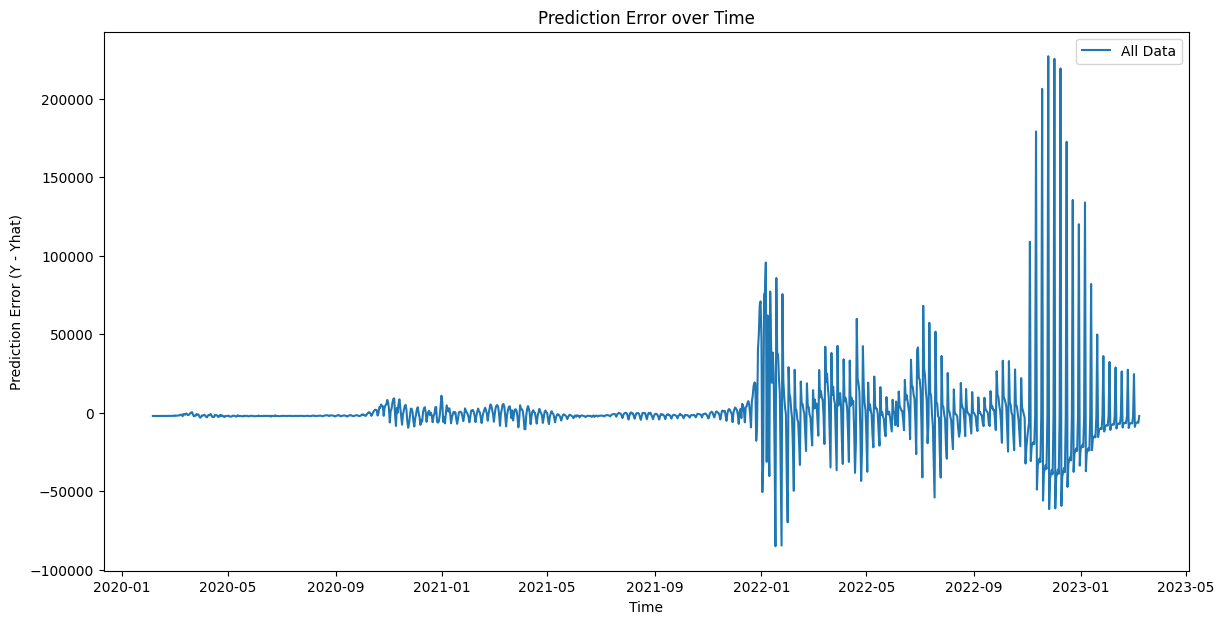

In [14]:
import matplotlib.pyplot as plt

dates_as_datetime = pd.to_datetime(dates.get_level_values(0), format='%m/%d/%y')
plt.figure(figsize=(14, 7))
plt.plot(dates_as_datetime , (Y - predictions_all_y), label='All Data')

plt.xlabel('Time')
plt.ylabel('Prediction Error (Y - Yhat)')
plt.title('Prediction Error over Time')
plt.legend()
plt.show()


In [15]:

# We need the dates for the second half of country A: Italy
Italy_outbreak_truncated_2 = Italy_outbreak_truncated.iloc[midpoint:]
dates_2 = Italy_outbreak_truncated_2.index

dates_2


MultiIndex([('8/22/21', 154),
            ('8/23/21', 154),
            ('8/24/21', 154),
            ('8/25/21', 154),
            ('8/26/21', 154),
            ('8/27/21', 154),
            ('8/28/21', 154),
            ('8/29/21', 154),
            ('8/30/21', 154),
            ('8/31/21', 154),
            ...
            ('2/28/23', 154),
            ( '3/1/23', 154),
            ( '3/2/23', 154),
            ( '3/3/23', 154),
            ( '3/4/23', 154),
            ( '3/5/23', 154),
            ( '3/6/23', 154),
            ( '3/7/23', 154),
            ( '3/8/23', 154),
            ( '3/9/23', 154)],
           length=565)

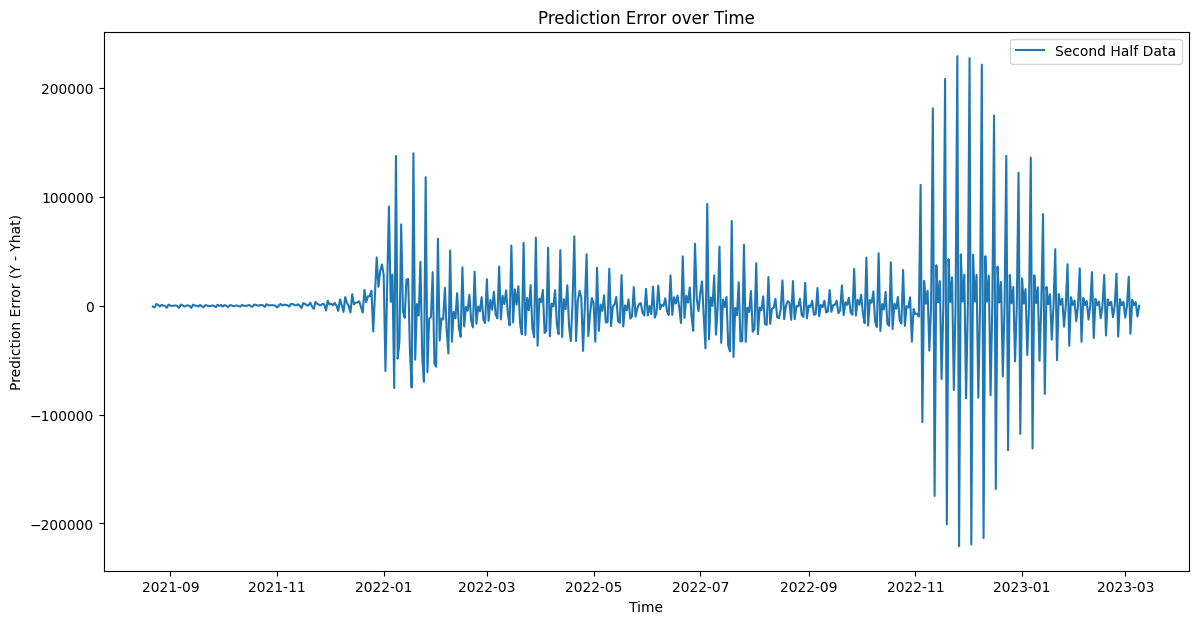

In [16]:
dates_as_datetime_2 = pd.to_datetime(dates_2.get_level_values(0), format='%m/%d/%y')
plt.figure(figsize=(14, 7))
plt.plot(dates_as_datetime_2, (Y[midpoint : ] - predictions_secondhalf_y), label='Second Half Data')
plt.xlabel('Time')
plt.ylabel('Prediction Error (Y - Yhat)')
plt.title('Prediction Error over Time')
plt.legend()
plt.show()

## Question 3

In [17]:
# Country B = Belgium
Belgium_all = covid_data[covid_data['Country/Region'] == 'Belgium']
pd.set_option('display.max_columns', 90)
Belgium_all

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,...,1/24/23,1/25/23,1/26/23,1/27/23,1/28/23,1/29/23,1/30/23,1/31/23,2/1/23,2/2/23,2/3/23,2/4/23,2/5/23,2/6/23,2/7/23,2/8/23,2/9/23,2/10/23,2/11/23,2/12/23,2/13/23,2/14/23,2/15/23,2/16/23,2/17/23,2/18/23,2/19/23,2/20/23,2/21/23,2/22/23,2/23/23,2/24/23,2/25/23,2/26/23,2/27/23,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
24,NaN,Belgium,50.8333,4.469936,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,8,...,4688927,4688927,4691499,4691499,4691499,4691499,4691499,4691499,4691499,4695403,4695403,4695403,4695403,4695403,4695403,4695403,4700949,4700949,4700949,4700949,4700949,4700949,4700949,4700949,4708273,4708273,4708273,4708273,4708273,4708273,4717655,4717655,4717655,4717655,4717655,4717655,4717655,4727795,4727795,4727795,4727795,4727795,4727795,4727795,4739365


In [18]:
# Choose Belgium and drop the first 4 columns
Belgium = covid_data[covid_data['Country/Region'] == 'Belgium'].drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1)
# Calculate the daily cases of Belgium
diff_Belgium = Belgium.diff(axis=1)
diff_Belgium.iloc[:, 0] = diff_Belgium.iloc[:, 0].fillna(0)
diff_Belgium = diff_Belgium.astype(int)
diff_Belgium

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,...,1/24/23,1/25/23,1/26/23,1/27/23,1/28/23,1/29/23,1/30/23,1/31/23,2/1/23,2/2/23,2/3/23,2/4/23,2/5/23,2/6/23,2/7/23,2/8/23,2/9/23,2/10/23,2/11/23,2/12/23,2/13/23,2/14/23,2/15/23,2/16/23,2/17/23,2/18/23,2/19/23,2/20/23,2/21/23,2/22/23,2/23/23,2/24/23,2/25/23,2/26/23,2/27/23,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
24,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,5,10,27,59,...,0,0,2572,0,0,0,0,0,0,3904,0,0,0,0,0,0,5546,0,0,0,0,0,0,0,7324,0,0,0,0,0,9382,0,0,0,0,0,0,10140,0,0,0,0,0,0,11570


In [19]:
# Find the outbreak date
first_day_b = None
for date in diff_Belgium.columns[0:]:  # Start from the '1/22/20' column
    if diff_Belgium[date].iloc[0] > 0:
        first_day_b = date
        break  # Stop looping once the first day is found

position_b = diff_Belgium.columns.get_loc(first_day_b)
position_b

13

In [20]:
# truncate the dataset to the outbreak onset
Belgium_outbreak = diff_Belgium.iloc[:, position_b:].unstack()
Belgium_outbreak 
# outbreak started on 2/4/20 in Belgium

2/4/20  24        1
2/5/20  24        0
2/6/20  24        0
2/7/20  24        0
2/8/20  24        0
              ...  
3/5/23  24        0
3/6/23  24        0
3/7/23  24        0
3/8/23  24        0
3/9/23  24    11570
Length: 1130, dtype: int64

In [21]:
## Create a matrix of five lagged versions
X_b = np.array([ Belgium_outbreak.shift(1), Belgium_outbreak.shift(2), Belgium_outbreak.shift(3), Belgium_outbreak.shift(4), Belgium_outbreak.shift(5)]).transpose()
## Add a vector of ones
itc_b = np.ones( (X_b.shape[0], 1) )
X_b = np.concatenate( (itc_b, X_b), axis = 1)

## Visualize the results
X_b[0 : 10,:]

array([[ 1., nan, nan, nan, nan, nan],
       [ 1.,  1., nan, nan, nan, nan],
       [ 1.,  0.,  1., nan, nan, nan],
       [ 1.,  0.,  0.,  1., nan, nan],
       [ 1.,  0.,  0.,  0.,  1., nan],
       [ 1.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.]])

In [22]:
# Get rid of the five NA rows
X_b = X_b[ 5 : X_b.shape[0], :]
np.any(np.isnan(X_b))

False

In [23]:
X_b[0 : 10, :]

array([[1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [24]:
## Create the Y vector
Y_b = np.array(Belgium_outbreak[ 5 : Belgium_outbreak.shape[0]])
[Y_b.shape, X_b.shape]


[(1125,), (1125, 6)]

In [25]:
# Use "model_all" to get the Y hat by inputting X_b
predictions_b_y = model_all.predict(X_b)
mse_b = mean_squared_error(Y_b, predictions_b_y)
mse_b

69796141.47855365

In [35]:
Belgium_outbreak_truncated = Belgium_outbreak.iloc[5:]
dates_b = Belgium_outbreak_truncated.index

dates_b

MultiIndex([( '2/9/20', 24),
            ('2/10/20', 24),
            ('2/11/20', 24),
            ('2/12/20', 24),
            ('2/13/20', 24),
            ('2/14/20', 24),
            ('2/15/20', 24),
            ('2/16/20', 24),
            ('2/17/20', 24),
            ('2/18/20', 24),
            ...
            ('2/28/23', 24),
            ( '3/1/23', 24),
            ( '3/2/23', 24),
            ( '3/3/23', 24),
            ( '3/4/23', 24),
            ( '3/5/23', 24),
            ( '3/6/23', 24),
            ( '3/7/23', 24),
            ( '3/8/23', 24),
            ( '3/9/23', 24)],
           length=1125)

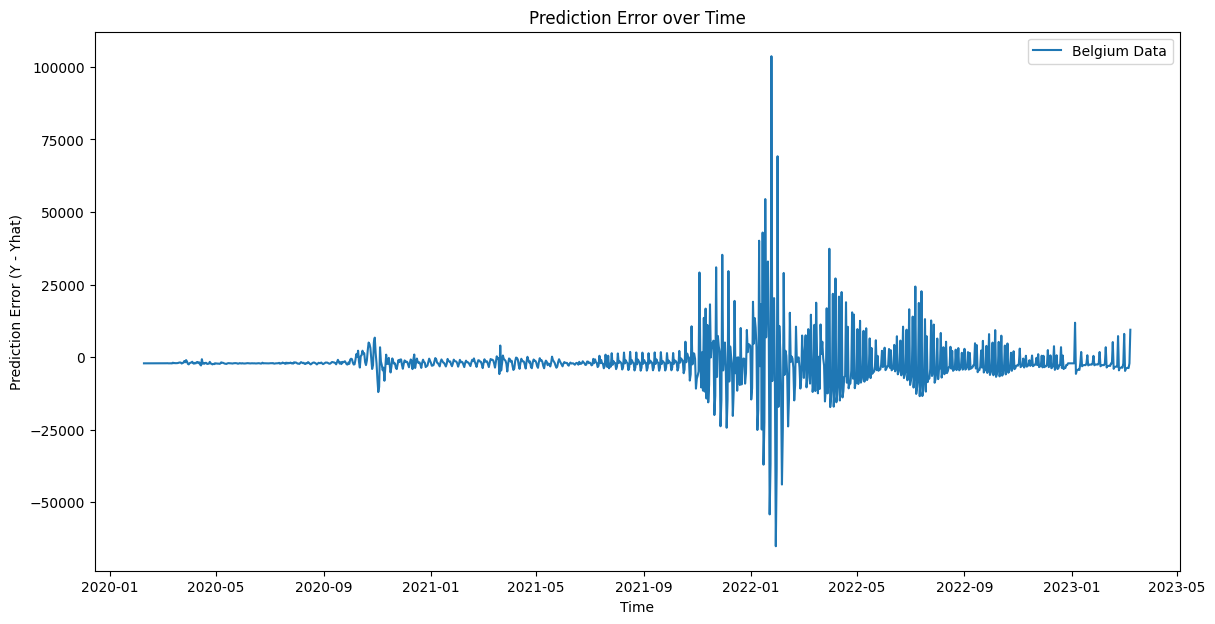

In [37]:
dates_as_datetime_b = pd.to_datetime(dates_b.get_level_values(0), format='%m/%d/%y')
plt.figure(figsize=(14, 7))
plt.plot(dates_as_datetime_b , (Y_b - predictions_b_y), label='Belgium Data')

plt.xlabel('Time')
plt.ylabel('Prediction Error (Y - Yhat)')
plt.title('Prediction Error over Time')
plt.legend()
plt.show()

## Question 4

In [26]:
# Return to the Italy data

# Calculate difference of the daily cases (next date - current date)
diff_dailycases = diff_Italy.diff(axis=1)
diff_dailycases.iloc[:, 0] = diff_dailycases.iloc[:, 0].fillna(0)
diff_dailycases = diff_dailycases.astype(int)
diff_dailycases


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,...,1/24/23,1/25/23,1/26/23,1/27/23,1/28/23,1/29/23,1/30/23,1/31/23,2/1/23,2/2/23,2/3/23,2/4/23,2/5/23,2/6/23,2/7/23,2/8/23,2/9/23,2/10/23,2/11/23,2/12/23,2/13/23,2/14/23,2/15/23,2/16/23,2/17/23,2/18/23,2/19/23,2/20/23,2/21/23,2/22/23,2/23/23,2/24/23,2/25/23,2/26/23,2/27/23,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
154,0,0,0,0,0,0,0,0,0,2,-2,0,0,0,0,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,17,25,51,-19,19,38,71,31,7,326,-224,124,121,182,9,...,0,0,0,38159,-38159,0,0,0,0,0,34377,-34377,0,0,0,0,0,30901,-30901,0,0,0,0,0,28347,-28347,0,0,0,0,0,29438,-29438,0,0,0,0,0,26658,-26658,0,0,0,0,0


In [27]:
# If the value <= 0, replace the value with 0; if the value > 0, replace the value with 1
diff_dailycases_Zvalue = diff_dailycases.map(lambda x: 1 if x > 0 else 0)
diff_dailycases_Zvalue

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,...,1/24/23,1/25/23,1/26/23,1/27/23,1/28/23,1/29/23,1/30/23,1/31/23,2/1/23,2/2/23,2/3/23,2/4/23,2/5/23,2/6/23,2/7/23,2/8/23,2/9/23,2/10/23,2/11/23,2/12/23,2/13/23,2/14/23,2/15/23,2/16/23,2/17/23,2/18/23,2/19/23,2/20/23,2/21/23,2/22/23,2/23/23,2/24/23,2/25/23,2/26/23,2/27/23,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
154,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [28]:
# Note that the outbreak in Italy started on 1/31/20
Zvalue_outbreak = diff_dailycases_Zvalue.iloc[:, position:].unstack()
Zvalue_outbreak

1/31/20  154    1
2/1/20   154    0
2/2/20   154    0
2/3/20   154    0
2/4/20   154    0
               ..
3/5/23   154    0
3/6/23   154    0
3/7/23   154    0
3/8/23   154    0
3/9/23   154    0
Length: 1134, dtype: int64

In [29]:
## Create a matrix of five lagged versions
X_logit = np.array([ Zvalue_outbreak.shift(1), Zvalue_outbreak.shift(2), Zvalue_outbreak.shift(3), Zvalue_outbreak.shift(4), Zvalue_outbreak.shift(5)]).transpose()
## Add a vector of ones
itc_logit = np.ones( (X_logit.shape[0], 1) )
X_logit = np.concatenate( (itc_logit, X_logit), axis = 1)

## Visualize the results
X_logit[0 : 10,:]


array([[ 1., nan, nan, nan, nan, nan],
       [ 1.,  1., nan, nan, nan, nan],
       [ 1.,  0.,  1., nan, nan, nan],
       [ 1.,  0.,  0.,  1., nan, nan],
       [ 1.,  0.,  0.,  0.,  1., nan],
       [ 1.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.,  0.]])

In [30]:
# Get rid of the five NA rows
X_logit = X_logit[ 5 : X_logit.shape[0], :]
np.any(np.isnan(X_logit))

False

In [31]:
X_logit[0 : 10, :]


array([[1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [32]:
## Create the Y vector
Y_logit = np.array(Zvalue_outbreak[ 5 : Zvalue_outbreak.shape[0]])
[Y_logit.shape, X_logit.shape]

[(1129,), (1129, 6)]

In [33]:
# Fit the logistic regression model
model_logit = linear_model.LogisticRegression(fit_intercept = False)
fit_logit = model_logit.fit(X_logit, Y_logit)
fit_logit.coef_

array([[-0.62211703,  0.69576705,  0.17197483, -0.36822766, -0.31007248,
         0.3659245 ]])

Markovian logit model:
$$
\text{logit}\{P(Z_t=1)\} = \alpha_0 + \beta_1 Z_{t-1} + \beta_2 Z_{t-2} + \beta_3 Z_{t-3} + \beta_4 Z_{t-4} + \beta_5 Z_{t-5}
$$

According to the above code chunk,

$\alpha_0$ = -0.622, which means that the log odds of the number of cases going up, $\log\left(\frac{P(Z_t=1)}{1 - P(Z_t=1)}\right)$  is -0.622 when all lagged predictors equal to 0.

$\beta_1$ = 0.696, which means that the log odds ratio (or difference in log odds) of the number of cases going up is 0.696 comparing $Z = 1$ to $Z = 0$ for day $(t-1)$, holding all other lagged predictors constant.

$\beta_2$ = 0.172, which means that the log odds ratio of the number of cases going up is 0.172 comparing $Z = 1$ to $Z = 0$ for day $(t-2)$, holding all other lagged predictors constant.

$\beta_3$ = -0.368, which means that the log odds ratio of the number of cases going up is -0.368 comparing $Z = 1$ to $Z = 0$ for day $(t-3)$, holding all other lagged predictors constant.

$\beta_4$ = -0.310, which means that the log odds ratio of the number of cases going up is -0.310 comparing $Z = 1$ to $Z = 0$ for day $(t-4)$, holding all other lagged predictors constant.

$\beta_5$ = 0.366, which means that the log odds ratio of the number of cases going up is 0.366 comparing $Z = 1$ to $Z = 0$ for day $(t-5)$, holding all other lagged predictors constant.